In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [2]:
d=pd.read_csv('census_income.csv')

In [3]:
df=pd.DataFrame(d)
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,31,Private,106347,11th,7,Separated,Other-service,Not-in-family,Black,Female,0.0,0.0,42.0,United-States,<=50K
1234,23,Private,174754,Some-college,10,Never-married,Sales,Not-in-family,White,Female,0.0,0.0,30.0,United-States,<=50K
1235,34,Private,441454,HS-grad,9,Never-married,Sales,Not-in-family,White,Female,0.0,0.0,24.0,United-States,<=50K
1236,41,Self-emp-not-inc,209344,HS-grad,9,Married-civ-spouse,Sales,Other-relative,White,Female,0.0,0.0,40.0,Cuba,<=50K


In [4]:
df.isnull().sum()

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            1
 Male             1
 2174             1
 0                1
 40               1
 United-States    1
 <=50K            1
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64

In [7]:
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,43,Private,413297,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,45.0,United-States,<=50K
1233,31,Private,106347,11th,7,Separated,Other-service,Not-in-family,Black,Female,0.0,0.0,42.0,United-States,<=50K
1234,23,Private,174754,Some-college,10,Never-married,Sales,Not-in-family,White,Female,0.0,0.0,30.0,United-States,<=50K
1235,34,Private,441454,HS-grad,9,Never-married,Sales,Not-in-family,White,Female,0.0,0.0,24.0,United-States,<=50K


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
df=pd.get_dummies(df,drop_first=True)

In [10]:
df

,39,77516,13,2174,0,40,State-gov_ Federal-gov,State-gov_ Local-gov,State-gov_ Private,State-gov_ Self-emp-inc,...,United-States_ Philippines,United-States_ Poland,United-States_ Portugal,United-States_ Puerto-Rico,United-States_ South,United-States_ Taiwan,United-States_ Thailand,United-States_ United-States,United-States_ Yugoslavia,<=50K_ >50K
0,50,83311,13,0.0,0.0,13.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,43,413297,9,0.0,0.0,45.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1233,31,106347,7,0.0,0.0,42.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1234,23,174754,10,0.0,0.0,30.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1235,34,441454,9,0.0,0.0,24.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
dfcor=df.corr()
dfcor

,39,77516,13,2174,0,40,State-gov_ Federal-gov,State-gov_ Local-gov,State-gov_ Private,State-gov_ Self-emp-inc,...,United-States_ Philippines,United-States_ Poland,United-States_ Portugal,United-States_ Puerto-Rico,United-States_ South,United-States_ Taiwan,United-States_ Thailand,United-States_ United-States,United-States_ Yugoslavia,<=50K_ >50K
39,1.000000,-0.089782,-0.019184,0.066172,0.051394,0.073768,0.051703,0.045011,-0.200372,0.103067,...,-0.034707,-0.029738,-0.025125,0.001493,0.002214,-0.029738,-0.002976,0.031410,0.037434,0.220345
77516,-0.089782,1.000000,-0.048186,0.040387,-0.043443,-0.039867,-0.008375,0.033820,0.007122,-0.026089,...,-0.019595,0.018468,-0.034446,-0.025796,-0.018814,0.007669,0.017257,-0.045458,-0.006123,0.002884
13,-0.019184,-0.048186,1.000000,0.142128,0.067903,0.244899,0.038763,-0.011130,-0.022812,0.039826,...,0.030305,0.029511,-0.020799,-0.066224,0.003296,0.081943,-0.001880,0.077582,-0.013222,0.336921
2174,0.066172,0.040387,0.142128,1.000000,-0.052219,0.113608,0.036298,-0.051708,-0.008125,0.075922,...,-0.012920,-0.011184,-0.012920,-0.012920,-0.011184,0.036027,-0.006452,0.033410,-0.006452,0.288176
0,0.051394,-0.043443,0.067903,-0.052219,1.000000,0.054951,-0.017769,-0.036274,0.011422,0.036288,...,0.053974,-0.011351,-0.013112,0.060717,0.057557,-0.011351,-0.006548,-0.055509,-0.006548,0.149026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United-States_ Taiwan,-0.029738,0.007669,0.081943,0.036027,-0.011351,0.005820,-0.007640,-0.013138,0.032957,-0.009690,...,-0.002808,-0.002431,-0.002808,-0.002808,-0.002431,1.000000,-0.001402,-0.145768,-0.001402,0.048941
United-States_ Thailand,-0.002976,0.017257,-0.001880,-0.006452,-0.006548,0.081322,-0.004407,-0.007579,-0.042554,0.144733,...,-0.001620,-0.001402,-0.001620,-0.001620,-0.001402,-0.001402,1.000000,-0.084091,-0.000809,0.050380
United-States_ United-States,0.031410,-0.045458,0.077582,0.033410,-0.055509,-0.032553,0.017204,0.047305,-0.024323,-0.046130,...,-0.168387,-0.145768,-0.168387,-0.168387,-0.145768,-0.145768,-0.084091,1.000000,-0.084091,0.016782
United-States_ Yugoslavia,0.037434,-0.006123,-0.013222,-0.006452,-0.006548,0.022849,-0.004407,-0.007579,0.019013,-0.005590,...,-0.001620,-0.001402,-0.001620,-0.001620,-0.001402,-0.001402,-0.000809,-0.084091,1.000000,-0.016059


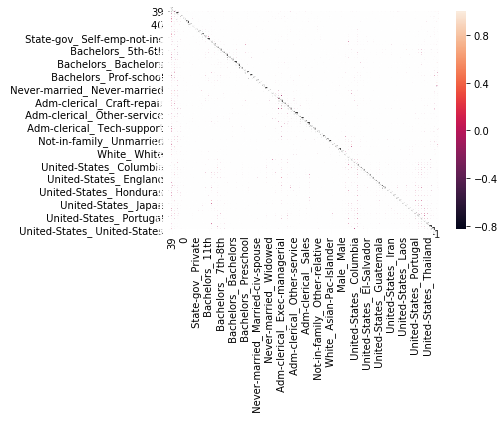

In [12]:

sns.heatmap(dfcor,annot=True)

In [13]:
df.skew()

39                                0.596605
 77516                            1.430530
 13                              -0.334847
 2174                             6.125784
 0                                4.227586
                                   ...    
 United-States_ Taiwan           20.256620
 United-States_ Thailand         35.171011
 United-States_ United-States    -2.621303
 United-States_ Yugoslavia       35.171011
 <=50K_ >50K                      1.208067
Length: 88, dtype: float64

In [14]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [15]:
df.skew()

39                               -0.135030
 77516                           -0.825548
 13                              -0.334847
 2174                             3.175116
 0                                4.057135
                                   ...    
 United-States_ Taiwan           20.256620
 United-States_ Thailand         35.171011
 United-States_ United-States    -2.621303
 United-States_ Yugoslavia       35.171011
 <=50K_ >50K                      1.208067
Length: 88, dtype: float64

In [16]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new

,39,77516,13,2174,0,40,State-gov_ Federal-gov,State-gov_ Local-gov,State-gov_ Private,State-gov_ Self-emp-inc,...,United-States_ Philippines,United-States_ Poland,United-States_ Portugal,United-States_ Puerto-Rico,United-States_ South,United-States_ Taiwan,United-States_ Thailand,United-States_ United-States,United-States_ Yugoslavia,<=50K_ >50K
25,2.995732,12.033474,9,0.0,0.0,40.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.000000
28,3.912023,12.172345,9,0.0,0.0,40.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.000000
30,3.044522,12.491312,10,0.0,0.0,44.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.000000
37,3.465736,11.340416,10,0.0,0.0,38.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.693359
50,2.944439,12.332516,9,0.0,0.0,30.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,3.891820,12.763263,9,0.0,0.0,40.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.000000
1225,3.610918,12.777275,13,0.0,0.0,60.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.693359
1232,3.784190,12.931924,9,0.0,0.0,45.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.000000
1234,3.178054,12.071140,10,0.0,0.0,30.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.000000


In [17]:
x=df_new.iloc[:,:-1]
x

,39,77516,13,2174,0,40,State-gov_ Federal-gov,State-gov_ Local-gov,State-gov_ Private,State-gov_ Self-emp-inc,...,United-States_ Mexico,United-States_ Philippines,United-States_ Poland,United-States_ Portugal,United-States_ Puerto-Rico,United-States_ South,United-States_ Taiwan,United-States_ Thailand,United-States_ United-States,United-States_ Yugoslavia
25,2.995732,12.033474,9,0.0,0.0,40.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
28,3.912023,12.172345,9,0.0,0.0,40.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
30,3.044522,12.491312,10,0.0,0.0,44.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
37,3.465736,11.340416,10,0.0,0.0,38.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
50,2.944439,12.332516,9,0.0,0.0,30.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,3.891820,12.763263,9,0.0,0.0,40.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
1225,3.610918,12.777275,13,0.0,0.0,60.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
1232,3.784190,12.931924,9,0.0,0.0,45.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
1234,3.178054,12.071140,10,0.0,0.0,30.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0


In [18]:
y=df_new.iloc[:,-1]
y

25      0.000000
28      0.000000
30      0.000000
37      0.693359
50      0.000000
          ...   
1220    0.000000
1225    0.693359
1232    0.000000
1234    0.000000
1235    0.000000
Name:  <=50K_ >50K, Length: 299, dtype: float16

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.56074295, -0.00637901, -0.75331463, ...,  0.        ,
         0.14310072,  0.        ],
       [ 1.13517284,  0.23200774, -0.75331463, ...,  0.        ,
         0.14310072,  0.        ],
       [-1.41719226,  0.77954532, -0.16213071, ...,  0.        ,
         0.14310072,  0.        ],
       ...,
       [ 0.75906077,  1.53590013, -0.75331463, ...,  0.        ,
         0.14310072,  0.        ],
       [-1.02431544,  0.05827944, -0.16213071, ...,  0.        ,
         0.14310072,  0.        ],
       [ 0.08576179,  1.64903637, -0.75331463, ...,  0.        ,
         0.14310072,  0.        ]])

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [21]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print('r2 score corresponding to ',r_state,'is',r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
        
    print('max r2_score corresponding to',final_r_state,'is',max_r_score)
    return final_r_state


In [22]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
maxr2_score(lreg,x,y)

r2 score corresponding to  42 is -3.7027558101816016e+23
r2 score corresponding to  43 is 0.35027050864844156
r2 score corresponding to  44 is 0.3423153625734473
r2 score corresponding to  45 is -0.04909950713580624
r2 score corresponding to  46 is 0.19075141104708482
r2 score corresponding to  47 is 0.1835301345682282
r2 score corresponding to  48 is -6.271787283410317e+26
r2 score corresponding to  49 is 0.3608125214423469
r2 score corresponding to  50 is -9.13493847021974e+26
r2 score corresponding to  51 is -2.4753269180372985e+28
r2 score corresponding to  52 is -1.4844908733351216e+28
r2 score corresponding to  53 is -1.5188518448218903e+27
r2 score corresponding to  54 is 0.2138003486883956
r2 score corresponding to  55 is 0.4255142912227018
r2 score corresponding to  56 is 0.3162912469497984
r2 score corresponding to  57 is 0.3317354816415068
r2 score corresponding to  58 is 0.3949185966251316
r2 score corresponding to  59 is 0.3875162433761252
r2 score corresponding to  60 is 

96

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 24}

In [24]:
knr=KNeighborsRegressor(n_neighbors=24)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to  42 is 0.18271737488540707
r2 score corresponding to  43 is 0.34586741128456056
r2 score corresponding to  44 is 0.3121817925393132
r2 score corresponding to  45 is 0.29203041440308575
r2 score corresponding to  46 is 0.2350088252008744
r2 score corresponding to  47 is 0.2332004610050672
r2 score corresponding to  48 is 0.2370619370710373
r2 score corresponding to  49 is 0.3374045138888889
r2 score corresponding to  50 is 0.191720813052355
r2 score corresponding to  51 is 0.2641342179232804
r2 score corresponding to  52 is 0.3581356737226792
r2 score corresponding to  53 is 0.2891103692597484
r2 score corresponding to  54 is 0.21573392030423277
r2 score corresponding to  55 is 0.34593346731542207
r2 score corresponding to  56 is 0.3205269813475653
r2 score corresponding to  57 is 0.2957297867063492
r2 score corresponding to  58 is 0.4109399576035667
r2 score corresponding to  59 is 0.3088905224955074
r2 score corresponding to  60 is 0.2908767022993226
r2 score

In [25]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 0.01}

In [26]:
lsreg=Lasso(alpha=0.01)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to  42 is 0.22244751308983135
r2 score corresponding to  43 is 0.354466312082665
r2 score corresponding to  44 is 0.35134154987527577
r2 score corresponding to  45 is 0.28924906010501406
r2 score corresponding to  46 is 0.2403271378460271
r2 score corresponding to  47 is 0.19789301396769354
r2 score corresponding to  48 is 0.3183503588619513
r2 score corresponding to  49 is 0.38717116243557226
r2 score corresponding to  50 is 0.23149991810968273
r2 score corresponding to  51 is 0.2626804155973482
r2 score corresponding to  52 is 0.341801911271545
r2 score corresponding to  53 is 0.3916017905991638
r2 score corresponding to  54 is 0.25378677190970544
r2 score corresponding to  55 is 0.39412109617626867
r2 score corresponding to  56 is 0.29883626210811653
r2 score corresponding to  57 is 0.3455478682736285
r2 score corresponding to  58 is 0.39881177517380406
r2 score corresponding to  59 is 0.30506019445669175
r2 score corresponding to  60 is 0.2701845504995839
r2 

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 100}

In [1]:
from sklearn.model_selection import cross_val_score
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=100)
print('Mean r2 score is',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())

NameError: name 'GradientBoostingRegressor' is not defined

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99,test_size=0.20)
lreg=LinearRegression()
lreg.fit(x,y)
y_pred=lreg.predict(x_test)

In [30]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.20082675297678634

In [31]:
mean_squared_error(y_test,y_pred)

0.04033138471119917

In [32]:
r2_score(y_test,y_pred)

0.34214626518333213

In [33]:
from sklearn.externals import joblib
joblib.dump(lreg,'Project_10.pkl')

['Project_10.pkl']